## PCA

**Principal Component Analysis**

There are two primary reasons for using PCA:

* **Data Reduction**:

    PCA is most commonly used to condense the information contained in a large number of original variables into a smaller set of new composite dimensions, with a minimum loss of information.
    
    
* **Interpretation**:

    PCA can be used to discover important features of a large data set. It often reveals relationships that were previously unsuspected, thereby allowing interpretations that would not ordinarily result.
    
PCA is typically used as an intermediate step in data analysis when the number of input variables is otherwise too large for useful analysis.


-https://www.originlab.com/doc/Origin-Help/PrincipleComp-Analysis

*the quick brown fox jumps over the lazzy dawg*

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

### Loading data

In [2]:
file_path = r'C:\Users\student\Documents\Python Scripts\datasets\wine.csv'

wine = pd.read_csv (file_path)
wine.head ()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Plotting data

[[ 2.8   3.92]
 [ 2.65  3.4 ]
 [ 2.8   3.17]
 [ 3.85  3.45]
 [ 2.8   2.93]
 [ 3.27  2.85]
 [ 2.5   3.58]
 [ 2.6   3.58]
 [ 2.8   2.85]
 [ 2.98  3.55]]


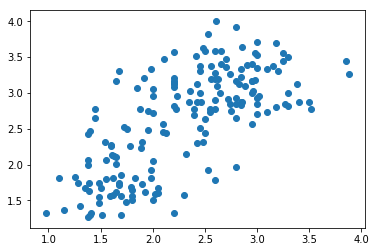

In [3]:
wine_data = wine[['total_phenols', 'od280']].values
print (wine_data[:10])

plt.scatter (wine_data[:, 0], wine_data[:, 1])
plt.show ()

**Checking correlation**

In [4]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr (wine_data[:, 0], wine_data[:, 1])
print ('Correlation:', correlation)
print ('P-value:', p_value)

Correlation: 0.699949364791
P-value: 1.5939800322e-27


### Applying PCA

[[-1.32771994  0.45139607]
 [-0.83249607  0.23309966]
 [-0.75216868 -0.02947892]
 [-1.64026613 -0.65572401]
 [-0.56799228 -0.18335891]
 [-0.80794847 -0.59533103]
 [-0.87445337  0.46361991]
 [-0.93857004  0.38687974]
 [-0.50660014 -0.23465224]
 [-1.15919131  0.07603211]]


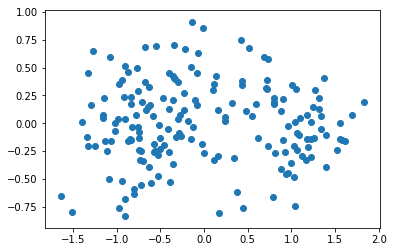

In [5]:
model = PCA ()
model.fit (wine_data)
transformed = model.transform (wine_data)

print (transformed[:10])

plt.scatter (transformed[:, 0], transformed[:, 1])
plt.show ()

**Checking correlation again**

In [6]:
correlation, p_value = pearsonr (wine_data[:, 0], wine_data[:, 1])
print ('Correlation:', correlation)
print ('P-value:', p_value)

Correlation: 0.699949364791
P-value: 1.5939800322e-27


### Intrinsic Dimensions

#### Importing dataset

In [7]:
from sklearn import datasets

iris = datasets.load_iris ()

print (iris.keys ())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


#### Creating DataFrame

Some doubt in 

```python
species = [iris['target_names'][x] for x in iris['target']]
```

In [8]:
species = [iris['target_names'][x] for x in iris['target']]

print (species[0], species[50], species[149])

df = pd.DataFrame (iris['data'], index = species, columns = iris['feature_names'])
df.head ()

setosa versicolor virginica


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2


**Creating another DataFrame**

With only 'versicolor' datapoints

In [9]:
df2 = df.loc['versicolor']
df2.head ()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
versicolor,7.0,3.2,4.7,1.4
versicolor,6.4,3.2,4.5,1.5
versicolor,6.9,3.1,4.9,1.5
versicolor,5.5,2.3,4.0,1.3
versicolor,6.5,2.8,4.6,1.5


**Plotting in 3D**

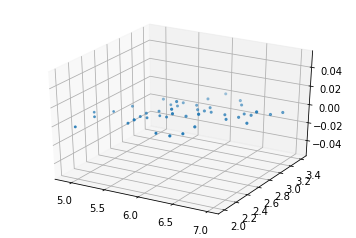

In [10]:
_3cols = df2[df2.columns[:3]].values

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure ()
ax = fig.add_subplot (111, projection = '3d')

plt.scatter (_3cols[:, 0], _3cols[:, 1], _3cols[:, 2])
plt.show ()

C:\Users\student\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


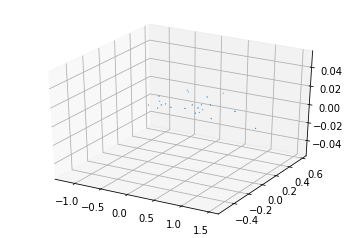

In [11]:
# applying PCA for above sample

model = PCA ()
transformed = model.fit_transform (_3cols)

fig = plt.figure ()
ax = fig.add_subplot (111, projection = '3d')

plt.scatter (transformed[:, 0], transformed[:, 1], transformed[:, 1], marker = '*')
plt.show ()

## PCA for Iris dataset

[ 2.93035378  0.92740362  0.14834223  0.02074601]


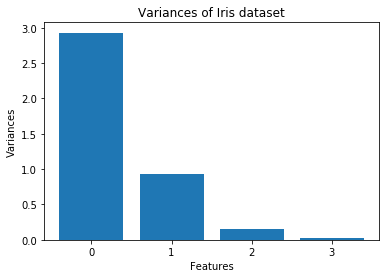

In [12]:
iris = datasets.load_iris ()
iris = iris['data']

model = PCA ()

from sklearn.preprocessing import StandardScaler

iris = StandardScaler ().fit_transform (iris)

transformed = model.fit_transform (iris)

variances = model.explained_variance_
print (variances)

features = range (len (variances))

plt.bar (features, variances)
plt.xticks (features)
plt.xlabel ('Features')
plt.ylabel ('Variances')
plt.title ('Variances of Iris dataset')
plt.show ()

In [13]:
# based on the above plot, only 2 features are enough
model = PCA (n_components = 2)
pca_features = model.fit_transform (iris)
print (model.n_components_) # number of components
print (model.n_features_) # number of features

2
4


**model.components**: Transformation matrix, which gives us the important features.

In [14]:
print (model.components_) # transformation matrix

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


In [15]:
print (pca_features[:10]) # important transformed features
# the following statement  gives the exact same result as the above statement.
print (np.matmul (iris, model.components_.T)[:10])

[[-2.26454173  0.5057039 ]
 [-2.0864255  -0.65540473]
 [-2.36795045 -0.31847731]
 [-2.30419716 -0.57536771]
 [-2.38877749  0.6747674 ]
 [-2.07053681  1.51854856]
 [-2.44571134  0.07456268]
 [-2.23384186  0.24761393]
 [-2.34195768 -1.09514636]
 [-2.18867576 -0.44862905]]
[[-2.26454173  0.5057039 ]
 [-2.0864255  -0.65540473]
 [-2.36795045 -0.31847731]
 [-2.30419716 -0.57536771]
 [-2.38877749  0.6747674 ]
 [-2.07053681  1.51854856]
 [-2.44571134  0.07456268]
 [-2.23384186  0.24761393]
 [-2.34195768 -1.09514636]
 [-2.18867576 -0.44862905]]
